In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import streamlit as st

In [3]:
df = pd.read_csv("bbc_news_dataset.csv")

In [4]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
df.tail()

,ArticleId,Text,Category
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech
1489,538,santy worm makes unwelcome visit thousands of ...,tech


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [7]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [8]:
X = df['Text']
y = df['Category']

In [9]:
print(df['Category'].unique())

['business' 'tech' 'politics' 'sport' 'entertainment']


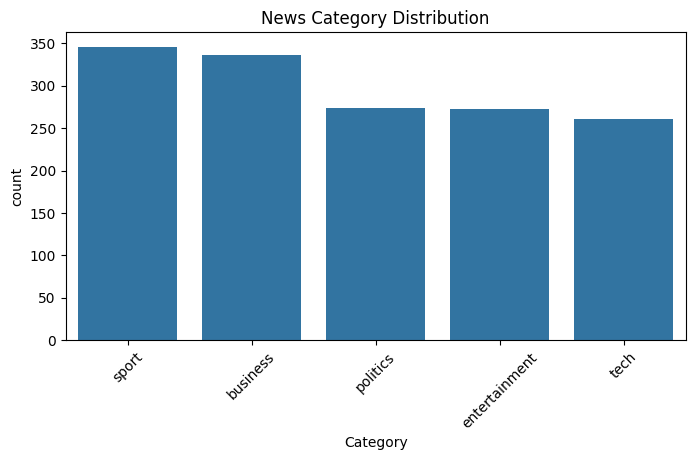

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(data = df, x='Category', order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("News Category Distribution")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X_train.head()

1166    fuming robinson blasts officials england coach...
1106    huge rush for jet airways shares indian airlin...
538     voters  don t trust politicians  eight out of ...
439     dundee utd 4-1 aberdeen dundee united eased in...
1478    visa row mandarin made sir john the top civil ...
Name: Text, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
print(f'Accuracy is {accuracy_score(y_test, y_preds)*100}')
print('\n', classification_report(y_test, y_preds))

Accuracy is 95.63758389261746

                precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



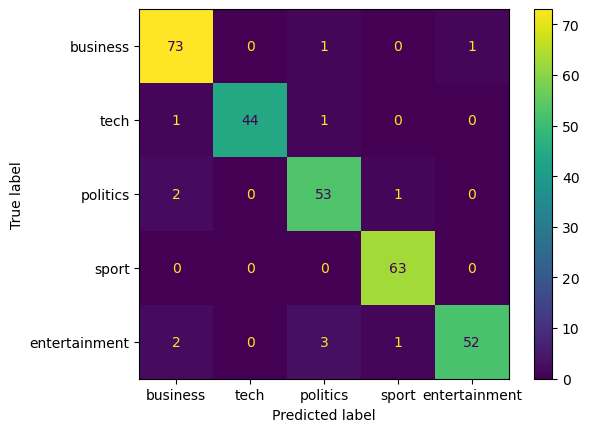

In [ ]:
cm = confusion_matrix(y_test, y_preds)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Category'].unique())
cm_plot.plot()

In [ ]:
# unseen data
news = [" I am Mr. Neupane, a footballer with three world cup winner. Now, I want to take retirement and I will be the next Prime Minister of Nepal, I will provide free health care and free eductaion to my beloved citizens."]
new_preds = model.predict(news)
for text, prediction in zip(news, new_preds):
    print(f"Text = {text}\nPredicted Category = {prediction}")

Text =  I am Mr. Neupane, a footballer with three world cup winner. Now, I want to take retirement and I will be the next Prime Minister of Nepal, I will provide free health care and free eductaion to my beloved citizens.
Predicted Category = politics


In [ ]:
joblib.dump(model, 'text_classifier.joblib')

['text_classifier.joblib']